### This notebook will try to build ML using lowcode library
- PyCaret
- pandas-profiling

In [1]:
# misc
import pandas as pd
from pandas_profiling import ProfileReport
from pycaret.classification import *

# load df development
df_dev = pd.read_csv("df_development.csv")
df_dev.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# setup dataset (train, test, unseen), etc

df_procc = df_dev.drop(['customerID', 'gender', 'SeniorCitizen'], axis=1)

model1 = setup(data = df_procc, target = 'Churn', fix_imbalance = True,
               log_experiment = True, experiment_name = 'tlkm_codex_2021_v2')

Setup Succesfully Completed!


,Description,Value
0,session_id,4868
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(7013, 18)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,14
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [3]:
# return top 3 models
top3 = compare_models(n_select = 3, exclude=['lr','lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ada Boost Classifier,0.7965,0.8462,0.6565,0.6077,0.6301,0.4902,0.4918,0.4571
1,Gradient Boosting Classifier,0.7953,0.8440,0.6011,0.6164,0.6071,0.4690,0.4702,1.6826
2,CatBoost Classifier,0.7930,0.8364,0.5579,0.6230,0.5873,0.4500,0.4521,5.7662
3,Light Gradient Boosting Machine,0.7914,0.8324,0.5524,0.6205,0.5832,0.4449,0.4471,0.3806
4,Extreme Gradient Boosting,0.7851,0.8236,0.5424,0.6060,0.5713,0.4287,0.4306,1.5531
5,Random Forest Classifier,0.7763,0.7871,0.4584,0.6018,0.5191,0.3772,0.3838,0.1095
6,Extra Trees Classifier,0.7666,0.7872,0.4785,0.5697,0.5188,0.3666,0.3697,0.3501
7,Quadratic Discriminant Analysis,0.7468,0.8384,0.7812,0.5159,0.6207,0.4429,0.4649,0.0165
8,Ridge Classifier,0.7462,0.0000,0.7912,0.5139,0.6228,0.4445,0.4683,0.0175
9,Decision Tree Classifier,0.7329,0.6675,0.5208,0.4973,0.5078,0.3250,0.3258,0.0573


In [4]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7699,0.8313,0.5538,0.5669,0.5603,0.4045,0.4045
1,0.8004,0.8425,0.6462,0.6176,0.6316,0.4948,0.4950
2,0.7800,0.8351,0.5923,0.5833,0.5878,0.4378,0.4378
3,0.8086,0.8664,0.5769,0.6579,0.6148,0.4881,0.4900
4,0.8045,0.8430,0.5692,0.6491,0.6066,0.4772,0.4790
5,0.7943,0.8449,0.6077,0.6124,0.6100,0.4703,0.4704
6,0.8086,0.8557,0.6077,0.6475,0.6270,0.4984,0.4988
7,0.7780,0.8189,0.4846,0.6000,0.5362,0.3924,0.3963
8,0.8167,0.8541,0.7054,0.6364,0.6691,0.5428,0.5442
9,0.7918,0.8481,0.6667,0.5931,0.6277,0.4839,0.4855


In [5]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7699,0.8115,0.5308,0.5702,0.5498,0.3955,0.3959
1,0.7597,0.8116,0.4385,0.5588,0.4914,0.3370,0.3413
2,0.7760,0.8152,0.5077,0.5893,0.5455,0.3979,0.3998
3,0.7841,0.8308,0.5000,0.6132,0.5508,0.4107,0.4144
4,0.7800,0.8079,0.5231,0.5965,0.5574,0.4119,0.4134
5,0.7780,0.8104,0.5000,0.5963,0.5439,0.3987,0.4014
6,0.7963,0.8421,0.5154,0.6442,0.5726,0.4411,0.4459
7,0.7617,0.7970,0.4077,0.5699,0.4753,0.3266,0.3343
8,0.7882,0.8329,0.5426,0.6087,0.5738,0.4335,0.4347
9,0.7714,0.8141,0.5194,0.5726,0.5447,0.3926,0.3934


In [6]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.07, loss='deviance', max_depth=40,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=130,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4868, subsample=0.9500000000000003,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

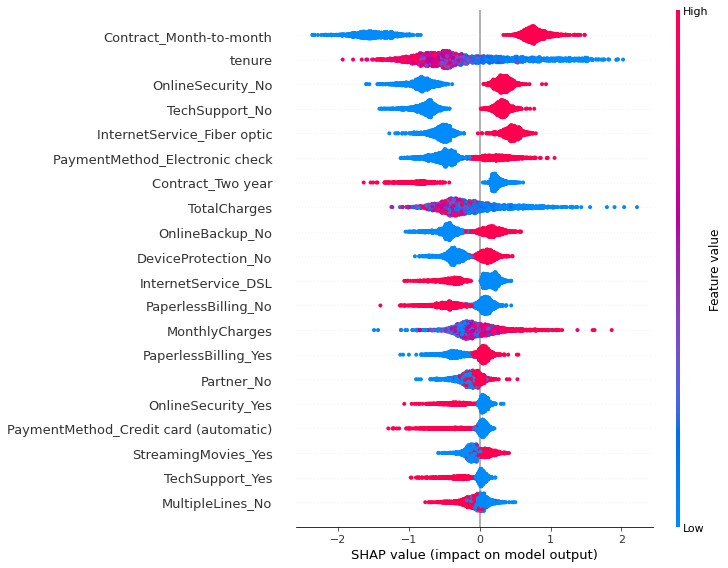

In [7]:
# Residual plot
interpret_model(tuned_gbc, plot = 'summary')

In [8]:
final_gbc = finalize_model(tuned_gbc)

In [9]:
unseen_predictions = predict_model(final_gbc)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9967,0.9999,0.9892,0.9982,0.9937,0.9914,0.9914


,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,Label,Score
0,63.0,104.75,6536.50,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,No,No,0.0080
1,43.0,90.25,3838.75,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,No,No,0.0345
2,67.0,83.85,5588.80,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,No,No,0.0043
3,68.0,105.30,7299.65,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Yes,Yes,0.9234
4,23.0,86.80,1940.80,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,No,No,0.0034
